In [1]:
import pandas as pd
import os
import datetime as dt
import numpy as np

/Users/stevenstensager/.pyenv/versions/3.9.0/envs/apps3/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
%matplotlib inline

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
sns.set_style("whitegrid")

In [6]:
df = pd.read_csv("/Users/stevenstensager/Dropbox/The Cabin/sce_cleaner/output.csv",
                parse_dates = [0, 1])

In [18]:
df.head(-10)

,Date,Start Time,End Time,kWh,Rate (Peak),Running kWh,Rate (Tiered)
0,2020-12-21,2021-02-20 00:00:00,01:00:00,0.29,0.27,0.29,0.22
1,2020-12-21,2021-02-20 01:00:00,02:00:00,0.24,0.27,0.53,0.22
2,2020-12-21,2021-02-20 02:00:00,03:00:00,0.33,0.27,0.86,0.22
3,2020-12-21,2021-02-20 03:00:00,04:00:00,0.31,0.27,1.17,0.22
4,2020-12-21,2021-02-20 04:00:00,05:00:00,0.31,0.27,1.48,0.22
...,...,...,...,...,...,...,...
1449,2021-02-19,2021-02-20 09:00:00,10:00:00,0.62,0.25,8.30,0.22
1450,2021-02-19,2021-02-20 10:00:00,11:00:00,0.76,0.25,9.06,0.22
1451,2021-02-19,2021-02-20 11:00:00,12:00:00,0.55,0.25,9.61,0.22
1452,2021-02-19,2021-02-20 12:00:00,13:00:00,0.63,0.25,10.24,0.22


In [8]:
df.dtypes

Date             datetime64[ns]
Start Time       datetime64[ns]
End Time                 object
kWh                     float64
Rate (Peak)             float64
Running kWh             float64
Rate (Tiered)           float64
dtype: object

<AxesSubplot:xlabel='Date', ylabel='kWh'>

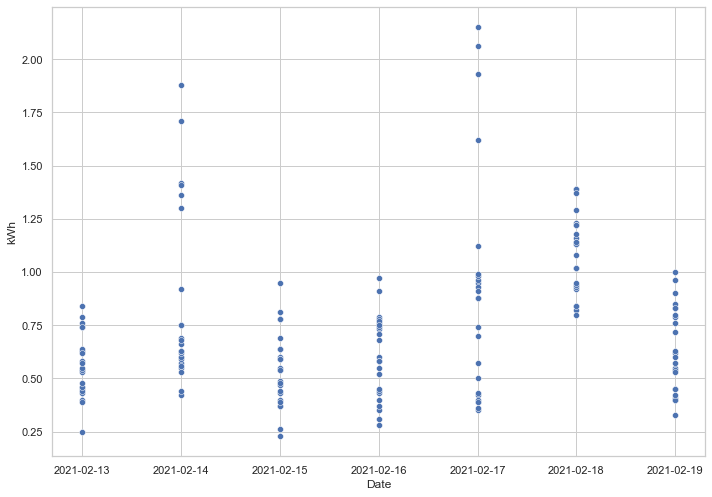

In [9]:
sns.scatterplot(data=df.tail(24*7), x="Date", y="kWh")

In [10]:
date = df.groupby('Date')

In [11]:
date.head(10)

,Date,Start Time,End Time,kWh,Rate (Peak),Running kWh,Rate (Tiered)
0,2020-12-21,2021-02-20 00:00:00,01:00:00,0.29,0.27,0.29,0.22
1,2020-12-21,2021-02-20 01:00:00,02:00:00,0.24,0.27,0.53,0.22
2,2020-12-21,2021-02-20 02:00:00,03:00:00,0.33,0.27,0.86,0.22
3,2020-12-21,2021-02-20 03:00:00,04:00:00,0.31,0.27,1.17,0.22
4,2020-12-21,2021-02-20 04:00:00,05:00:00,0.31,0.27,1.48,0.22
...,...,...,...,...,...,...,...
1445,2021-02-19,2021-02-20 05:00:00,06:00:00,0.80,0.27,5.13,0.22
1446,2021-02-19,2021-02-20 06:00:00,07:00:00,1.00,0.27,6.13,0.22
1447,2021-02-19,2021-02-20 07:00:00,08:00:00,0.72,0.27,6.85,0.22
1448,2021-02-19,2021-02-20 08:00:00,09:00:00,0.83,0.25,7.68,0.22


In [12]:
df.groupby(df["Date"].dt.date)["kWh"].agg(['sum']).reset_index()

,Date,sum
0,2020-12-21,14.58
1,2020-12-22,12.17
2,2020-12-23,18.28
3,2020-12-24,17.55
4,2020-12-25,17.62
...,...,...
56,2021-02-15,13.03
57,2021-02-16,14.45
58,2021-02-17,21.61
59,2021-02-18,26.15


In [13]:
daily_df=df.groupby(df["Date"].dt.date)["kWh"].agg(['sum']).reset_index()

In [14]:
daily_df.columns

Index(['Date', 'sum'], dtype='object')

[Text(0, 0, '2020-12-21'),
 Text(1, 0, '2020-12-22'),
 Text(2, 0, '2020-12-23'),
 Text(3, 0, '2020-12-24'),
 Text(4, 0, '2020-12-25'),
 Text(5, 0, '2020-12-26'),
 Text(6, 0, '2020-12-27'),
 Text(7, 0, '2020-12-28'),
 Text(8, 0, '2020-12-29'),
 Text(9, 0, '2020-12-30'),
 Text(10, 0, '2020-12-31'),
 Text(11, 0, '2021-01-01'),
 Text(12, 0, '2021-01-02'),
 Text(13, 0, '2021-01-03'),
 Text(14, 0, '2021-01-04'),
 Text(15, 0, '2021-01-05'),
 Text(16, 0, '2021-01-06'),
 Text(17, 0, '2021-01-07'),
 Text(18, 0, '2021-01-08'),
 Text(19, 0, '2021-01-09'),
 Text(20, 0, '2021-01-10'),
 Text(21, 0, '2021-01-11'),
 Text(22, 0, '2021-01-12'),
 Text(23, 0, '2021-01-13'),
 Text(24, 0, '2021-01-14'),
 Text(25, 0, '2021-01-15'),
 Text(26, 0, '2021-01-16'),
 Text(27, 0, '2021-01-17'),
 Text(28, 0, '2021-01-18'),
 Text(29, 0, '2021-01-19'),
 Text(30, 0, '2021-01-20'),
 Text(31, 0, '2021-01-21'),
 Text(32, 0, '2021-01-22'),
 Text(33, 0, '2021-01-23'),
 Text(34, 0, '2021-01-24'),
 Text(35, 0, '2021-01-25'),
 T

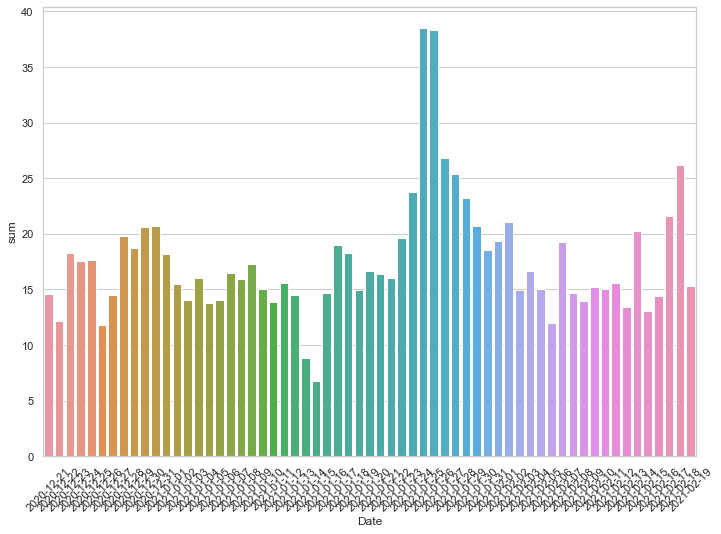

In [15]:
dailyPlot = sns.barplot(data=daily_df, x="Date", y="sum")
loc, labels = plt.xticks()
dailyPlot.set_xticklabels(labels, rotation=45)

